# Sales Forecasting using Time Series Analysis
### Codec Technologies Internship Project
**Intern:** Arya Vijay Sakore  
**Duration:** January 2026 – February 2026


## Problem Statement

The objective of this project is to forecast future sales using historical retail transaction data.

Accurate sales forecasting helps businesses:
- Plan inventory
- Allocate resources
- Optimize marketing strategies
- Improve revenue predictability


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet


### Data Loading


In [15]:
df = pd.read_csv('/content/superstore_dataset.csv')
df.head()


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


## Dataset Overview


In [16]:
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

,0
order_id,0
order_date,0
ship_date,0
customer,0
manufactory,0
product_name,0
segment,0
category,0
subcategory,0
region,0


## Data Preprocessing


In [17]:
df['order_date'] = pd.to_datetime(df['order_date'])


In [18]:
df = df.sort_values('order_date')


In [19]:
monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()
monthly_sales.head()


/tmp/ipython-input-4013813975.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()


,order_date,sales
0,2019-01-31,14236.895
1,2019-02-28,4519.892
2,2019-03-31,55691.009
3,2019-04-30,28295.345
4,2019-05-31,23648.287


## Exploratory Data Analysis


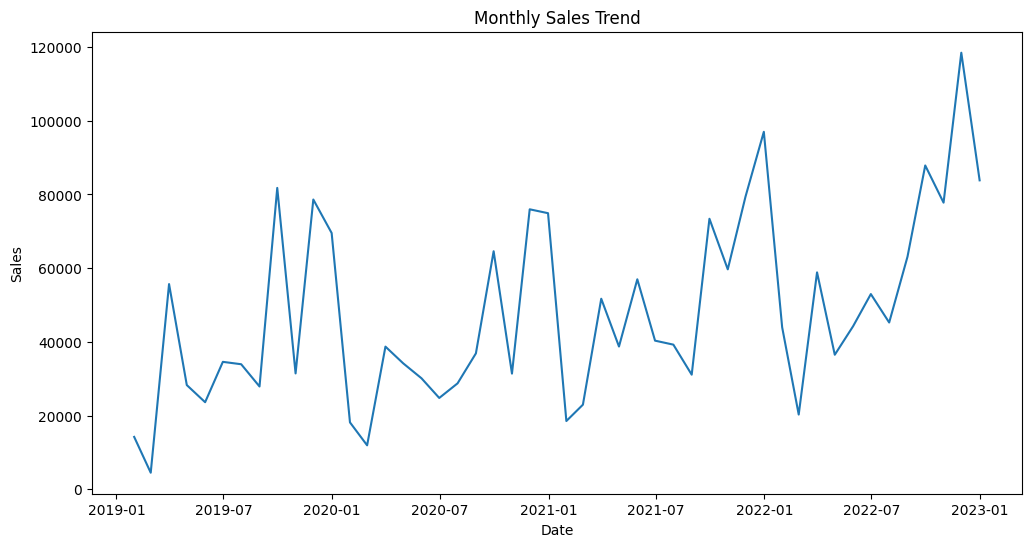

In [20]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['order_date'], monthly_sales['sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


Observation:
The sales data shows trend and seasonal fluctuations over time.


## Preparing Data for Prophet


In [21]:
prophet_df = monthly_sales.rename(columns={
    'order_date': 'ds',
    'sales': 'y'
})


## Model Training (Prophet)


In [22]:
model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting Future Sales


In [23]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
55,2023-08-31,56854.409141,47562.614815,66160.782061
56,2023-09-30,103154.229777,93929.006212,112445.652653
57,2023-10-31,69921.084404,60033.333457,79316.839627
58,2023-11-30,113602.404713,104549.335021,122651.859118
59,2023-12-31,97309.528979,87698.213352,106718.341769


## Forecast Visualization


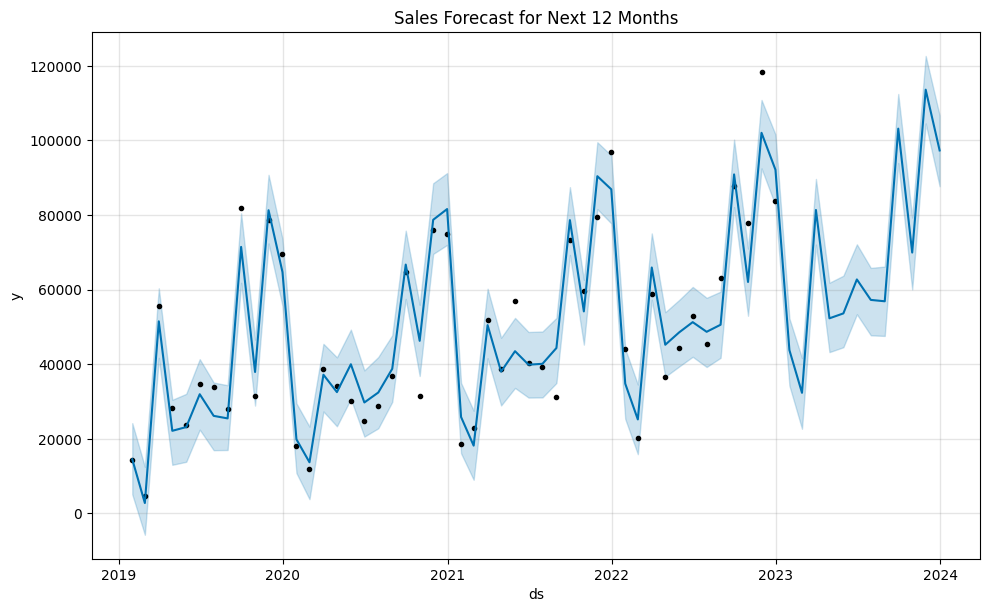

In [24]:
model.plot(forecast)
plt.title("Sales Forecast for Next 12 Months")
plt.show()


## Trend and Seasonality Components


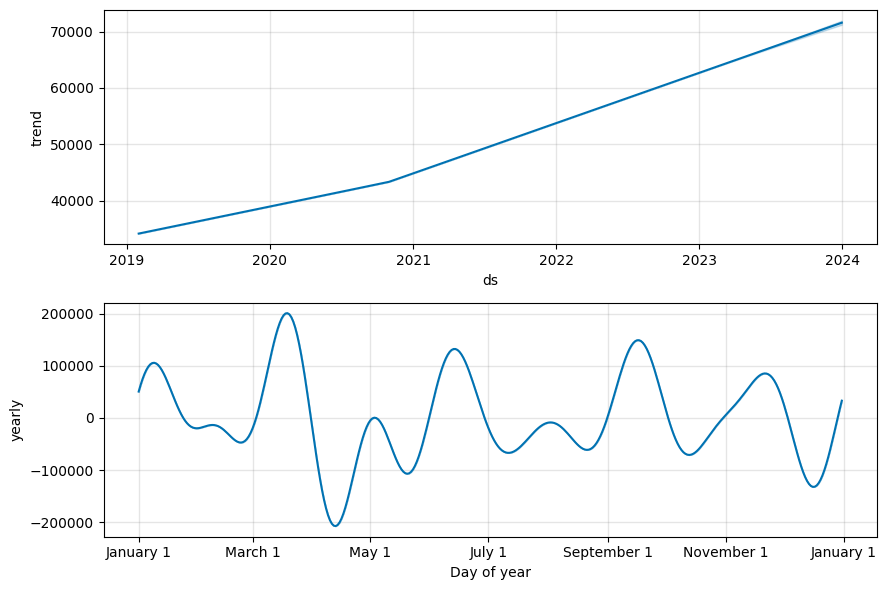

In [25]:
model.plot_components(forecast)
plt.show()


## Conclusion and Business Insights
Sales show overall upward trend.

Seasonal spikes observed.

Forecast predicts continued growth.

Business should prepare inventory for peak months.

Marketing budgets should align with seasonal increases.

In [26]:
!pip install prophet


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet


In [28]:
url = "https://raw.githubusercontent.com/nileshely/SuperStore-Dataset-2019-2022/main/superstore_dataset.csv"
df = pd.read_csv(url)

df.head()


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [32]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   object        
 3   customer       9994 non-null   object        
 4   manufactory    9994 non-null   object        
 5   product_name   9994 non-null   object        
 6   segment        9994 non-null   object        
 7   category       9994 non-null   object        
 8   subcategory    9994 non-null   object        
 9   region         9994 non-null   object        
 10  zip            9994 non-null   int64         
 11  city           9994 non-null   object        
 12  state          9994 non-null   object        
 13  country        9994 non-null   object        
 14  discount       9994 non-null   float64       
 15  profit         9994 n

,0
order_id,0
order_date,0
ship_date,0
customer,0
manufactory,0
product_name,0
segment,0
category,0
subcategory,0
region,0


## Data Preprocessing


In [31]:
df['order_date'] = pd.to_datetime(df['order_date'])


In [33]:
df = df.sort_values('order_date')


In [34]:
monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()

monthly_sales.head()


/tmp/ipython-input-4087669145.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()


,order_date,sales
0,2019-01-31,14236.895
1,2019-02-28,4519.892
2,2019-03-31,55691.009
3,2019-04-30,28295.345
4,2019-05-31,23648.287


In [35]:
monthly_sales.shape


(48, 2)

## Exploratory Data Analysis


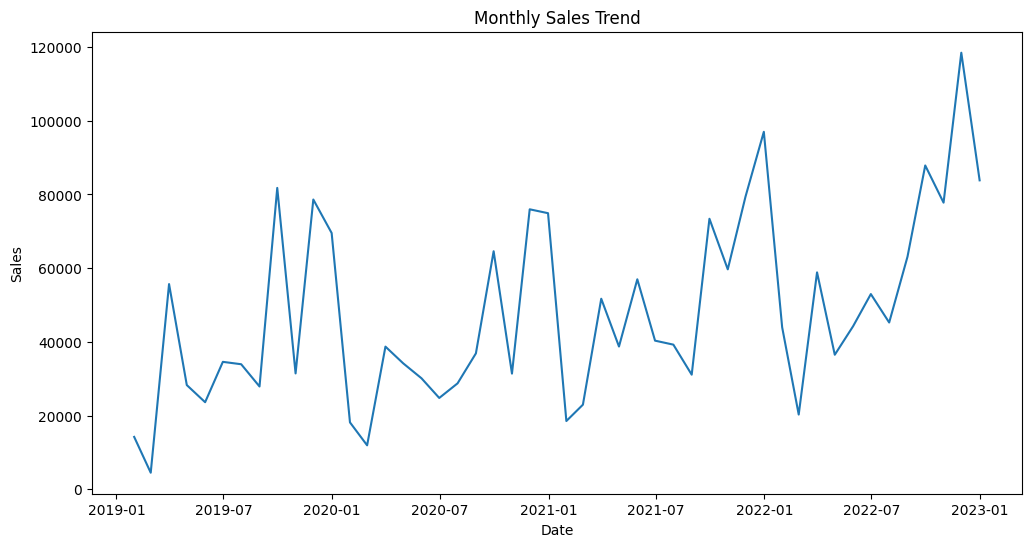

In [36]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['order_date'], monthly_sales['sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


### Observations:

- Sales show an overall upward trend from 2019 to 2022.
- Noticeable seasonal spikes occur toward the end of each year.
- Monthly sales exhibit volatility but maintain long-term growth.
- The increasing peak levels indicate business expansion over time.


## Preparing Data for Prophet


In [37]:
prophet_df = monthly_sales.rename(columns={
    'order_date': 'ds',
    'sales': 'y'
})

prophet_df.head()


,ds,y
0,2019-01-31,14236.895
1,2019-02-28,4519.892
2,2019-03-31,55691.009
3,2019-04-30,28295.345
4,2019-05-31,23648.287


## Model Training (Prophet)


In [38]:
model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting Future Sales


In [39]:
future = model.make_future_dataframe(periods=12, freq='M')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
55,2023-08-31,56854.409141,48233.351858,66429.480676
56,2023-09-30,103154.229777,94409.746785,112534.386717
57,2023-10-31,69921.084404,61113.553415,78754.046848
58,2023-11-30,113602.404713,104399.294768,122656.619352
59,2023-12-31,97309.528979,87633.722749,106854.790489


## Forecast Visualization


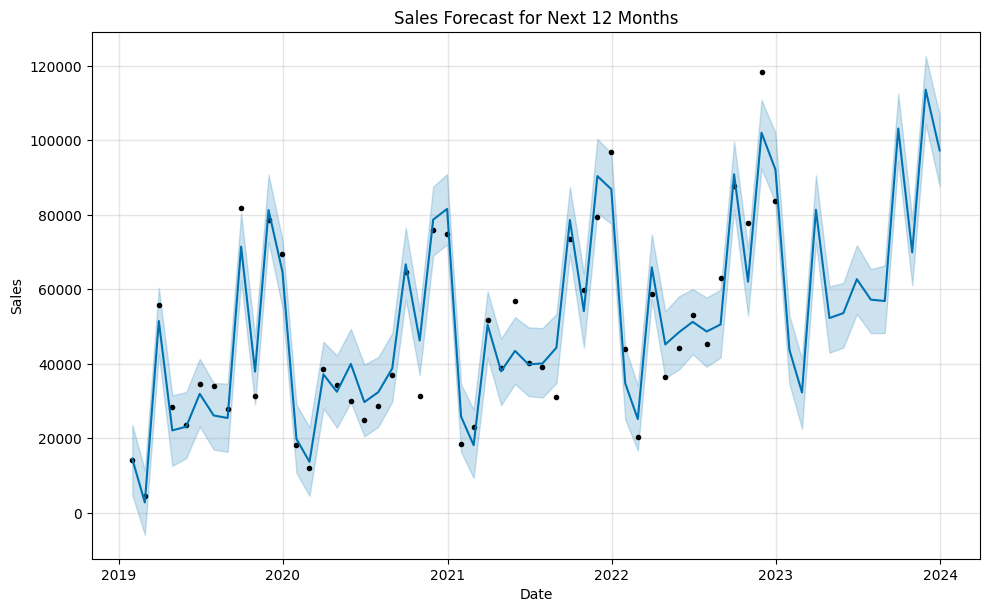

In [40]:
model.plot(forecast)
plt.title("Sales Forecast for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


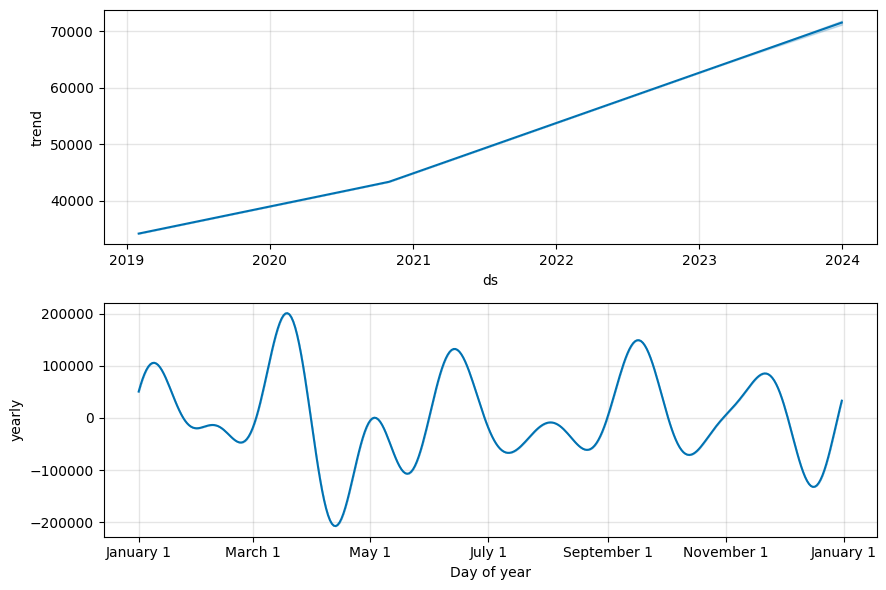

In [41]:
model.plot_components(forecast)
plt.show()


## Conclusion & Business Insights

### Model Insights:
- Sales show a strong upward long-term growth trend.
- Yearly seasonality significantly impacts revenue patterns.
- Peak sales periods repeat annually, indicating predictable high-demand months.
- Forecast suggests continued business expansion into 2023.

### Business Recommendations:
- Increase inventory before seasonal peak months.
- Allocate higher marketing budgets during high-demand periods.
- Optimize staffing during peak sales cycles.
- Use forecasting insights for financial planning and budgeting.
- Prepare supply chain buffers for expected Q4 spikes.

### Project Summary:
Prophet successfully captured trend and seasonality patterns in historical data and provided reliable 12-month forecasts.
The model demonstrates practical application of time-series forecasting in retail sales.


## Train-Test Split (Time Series)


In [42]:
# Split data
train = prophet_df.iloc[:36]
test = prophet_df.iloc[36:]

print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)


Training Data Shape: (36, 2)
Testing Data Shape: (12, 2)


## Model Training on Training Data


In [43]:
model_train = Prophet()
model_train.fit(train)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting on Test Data


In [44]:
# Create future dataframe for 12 months (test period)
future_test = model_train.make_future_dataframe(periods=12, freq='ME')

forecast_test = model_train.predict(future_test)

# Extract only the forecasted test period
forecast_test = forecast_test[['ds', 'yhat']].iloc[-12:]

forecast_test.head()


,ds,yhat
36,2022-01-31,27766.254894
37,2022-02-28,23010.291424
38,2022-03-31,64491.565276
39,2022-04-30,44522.536687
40,2022-05-31,46198.297722


In [45]:
comparison = test.merge(forecast_test, on='ds')

comparison


,ds,y,yhat
0,2022-01-31,43971.3740,27766.254894
1,2022-02-28,20301.1334,23010.291424
2,2022-03-31,58872.3528,64491.565276
3,2022-04-30,36521.5361,44522.536687
4,2022-05-31,44261.1102,46198.297722
5,2022-06-30,52981.7257,46701.022432
6,2022-07-31,45264.4160,46622.679754
7,2022-08-31,63120.8880,41911.186662
8,2022-09-30,87866.6520,88967.616975
9,2022-10-31,77776.9232,51907.426812


## Model Evaluation


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(comparison['y'], comparison['yhat'])
rmse = np.sqrt(mean_squared_error(comparison['y'], comparison['yhat']))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 10424.49314734636
RMSE: 13924.798618871542


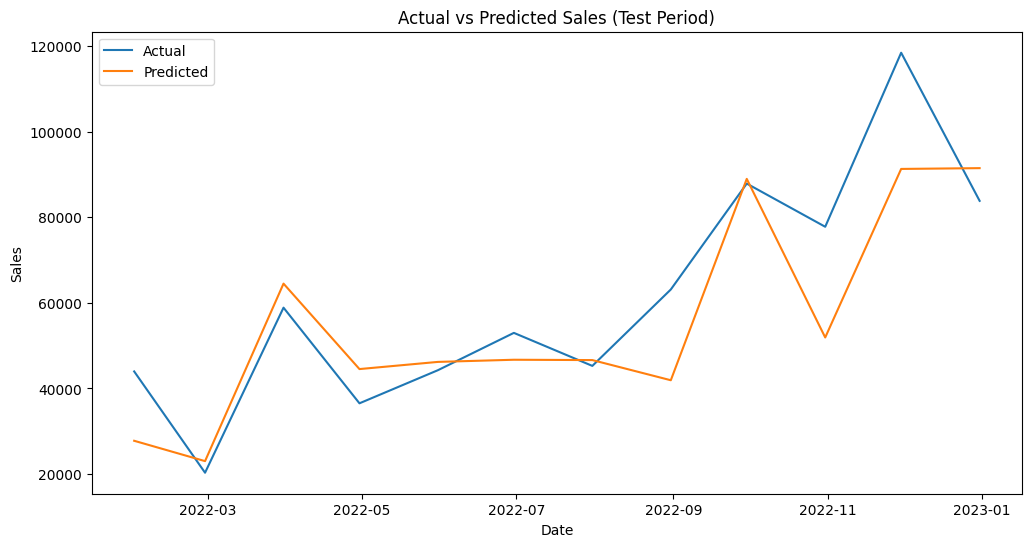

In [47]:
plt.figure(figsize=(12,6))
plt.plot(comparison['ds'], comparison['y'], label='Actual')
plt.plot(comparison['ds'], comparison['yhat'], label='Predicted')
plt.title("Actual vs Predicted Sales (Test Period)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


### Evaluation Interpretation:

- Mean Absolute Error (MAE) is approximately 10,424, meaning predictions deviate from actual sales by about 10k units on average.
- RMSE is approximately 13,925, indicating occasional larger deviations during peak sales months.
- Considering peak monthly sales exceed 100,000, the forecasting error is within an acceptable business range.
- The model captures overall trend and seasonality effectively but may slightly underperform during extreme seasonal spikes.
